In [257]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [188]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prate\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [189]:
Subjectdata = pd.read_csv('emails.csv',usecols = [0,1])
Bodydata = pd.read_csv('spamWithBody.csv')

In [190]:
Subjectdata = Subjectdata[(Subjectdata['spam'] =='1')|(Subjectdata['spam'] =='0')]
# .drop(Subjectdata['spam'] !='1'and Subjectdata['spam'] !='0')

In [191]:
mxPot = pd.read_csv('emails/Email_MXPot.csv')
news = pd.read_csv('emails/Email_news.csv')
shop = pd.read_csv('emails/Email_shop.csv')
sport = pd.read_csv('emails/Email_sports.csv')
social = pd.read_csv('emails/Emails_social.csv')

In [192]:
print(len(mxPot),len(news),len(shop),len(sport),len(social))

33 39 52 51 60


In [193]:
mxPot['AllText']=mxPot['Subject']+mxPot['Email Text']
news['AllText']=news['Subject']+news['Email Text']
shop['AllText']=shop['Subject']+shop['Email Text']
sport['AllText']=sport['Subject']+sport['Email Text']
social['AllText']=social['Subject']+social['Email Text']

In [194]:
def process_text(text):
    # remove punc
    nopunc = [c for c in text if c not in string.punctuation]
    nopunc = ''.join(nopunc)
    # remove stopwords
    words = [w for w in nopunc.split() if w.lower() not in stopwords.words('english')]
    return str(' '.join(words))

In [195]:
mxPot['AllText'] = mxPot['AllText'].apply(process_text)
news['AllText'] = news['AllText'].apply(process_text)
shop['AllText'] = shop['AllText'].apply(process_text)
sport['AllText'] = sport['AllText'].apply(process_text)
social['AllText'] = social['AllText'].apply(process_text)

# Classifier based on subject lines and body

In [196]:
Subjectdata.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [197]:
Subjectdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5726 entries, 0 to 5729
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5726 non-null   object
 1   spam    5726 non-null   object
dtypes: object(2)
memory usage: 134.2+ KB


In [198]:
Subjectdata.describe()

,text,spam
count,5726,5726
unique,5693,2
top,Subject: vp & director count for the research ...,0
freq,2,4359


In [199]:
print(Subjectdata['text'][10])

Subject: las vegas high rise boom  las vegas is fast becoming a major metropolitan city ! 60 +  new high rise towers are expected to be built on and around the las vegas strip  within the next 3 - 4 years , that ' s 30 , 000 + condominiums !  this boom has just begun ! buy first . . . early phase ,  pre - construction pricing is now available on las vegas high rises including  trump , cosmopolitan , mgm , turnberry , icon , sky , among others .  join the interest list :  http : / / www . verticallv . com  message has been sent to you by realty one highrise . learn more at www . verticallv . comif you  wish to be excluded from future mailings , please reply with the word remove in  the subject line . 


In [200]:
Subjectdata.isnull().sum()

text    0
spam    0
dtype: int64

In [201]:
Subjectdata.dropna(inplace=True)
Subjectdata.drop_duplicates(inplace=True)

## Vectorization and spliting

In [202]:
x = Subjectdata['text'] #.apply(process_text)
y = Subjectdata['spam']

In [203]:
len(y)

5693

In [204]:
alldata = mxPot['AllText']
alldata = alldata.append(news['AllText'])
alldata = alldata.append(shop['AllText'])
alldata = alldata.append(sport['AllText'])
alldata = alldata.append(social['AllText'])
vect = x.append(alldata)

In [205]:
len(vect)

5928

In [206]:
print(len(mxPot['AllText']),len(news['AllText']),len(shop['AllText']),len(sport['AllText']),len(social['AllText']))
print(sum([len(mxPot['AllText']),len(news['AllText']),len(shop['AllText']),len(sport['AllText']),len(social['AllText'])]))
print('5930-5693',5930-5693)

33 39 52 51 60
235
5930-5693 237


In [207]:
cv=CountVectorizer()
vect=cv.fit_transform(vect)

In [208]:
x_vec = vect[:5693]

In [209]:
x_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [210]:
y.unique()

array(['1', '0'], dtype=object)

In [211]:
# Spliting in test and train
xtrain,xtest,ytrain,ytest=train_test_split(x_vec,y,test_size=0.2,random_state=1)

## Apply Models

### Multinomial baive Bayes

In [234]:
from sklearn.metrics import precision_recall_fscore_support

In [286]:
gnb=MultinomialNB()
gnb.fit(xtrain,ytrain)

MultinomialNB()

In [287]:
xtest

<1139x39548 sparse matrix of type '<class 'numpy.int64'>'
	with 138118 stored elements in Compressed Sparse Row format>

In [288]:
gnb.score(xtest,ytest)

0.9850746268656716

In [289]:
gnb.score(xtest,ytest)
# gnb.predict(xtest)
y_pred_dt = gnb.predict(xtest)

In [290]:
cm = confusion_matrix(ytest, y_pred_dt)
rep = classification_report(ytest, y_pred_dt)

In [291]:
[round(np.mean(x),3) for x in precision_recall_fscore_support(ytest, y_pred_dt)]

[0.974, 0.986, 0.98, 569.5]

In [292]:
print(cm)

[[851  14]
 [  3 271]]


In [293]:
print(rep)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       865
           1       0.95      0.99      0.97       274

    accuracy                           0.99      1139
   macro avg       0.97      0.99      0.98      1139
weighted avg       0.99      0.99      0.99      1139



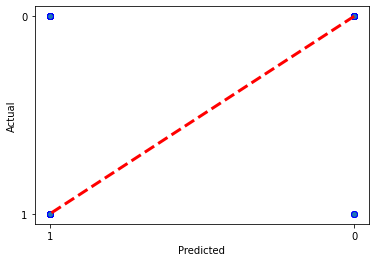

In [294]:
fig, ax = plt.subplots()
ax.scatter(y_pred_dt, ytest, edgecolors=(0, 0, 1))
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

### Bernoulli Naive Bayes

In [307]:
bnb=BernoulliNB()
bnb.fit(xtrain,ytrain)

BernoulliNB()

In [308]:
bnb.score(xtest,ytest)
# y_pred_dt = bnb.predict(xtest)

0.9824407374890255

In [297]:
cm = confusion_matrix(ytest, y_pred_dt)
rep = classification_report(ytest, y_pred_dt)

In [298]:
print(cm)

[[855  10]
 [ 10 264]]


In [299]:
print(rep)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       865
           1       0.96      0.96      0.96       274

    accuracy                           0.98      1139
   macro avg       0.98      0.98      0.98      1139
weighted avg       0.98      0.98      0.98      1139



In [300]:
[round(np.mean(x),3) for x in precision_recall_fscore_support(ytest, y_pred_dt)]

[0.976, 0.976, 0.976, 569.5]

### SVM

In [301]:
model = SVC(random_state = 0)
model.fit(xtrain,ytrain)

SVC(random_state=0)

In [302]:
y_pred_dt = model.predict(xtest)
model.score(xtrain,ytrain)

0.9756258234519104

In [303]:
cm = confusion_matrix(ytest, y_pred_dt)
rep = classification_report(ytest, y_pred_dt)

In [304]:
print(cm)

[[861   4]
 [ 44 230]]


In [305]:
print(rep)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       865
           1       0.98      0.84      0.91       274

    accuracy                           0.96      1139
   macro avg       0.97      0.92      0.94      1139
weighted avg       0.96      0.96      0.96      1139



In [306]:
[round(np.mean(x),3) for x in precision_recall_fscore_support(ytest, y_pred_dt)]

[0.967, 0.917, 0.939, 569.5]

## Use data for our dataset

In [82]:
# mxPot = pd.read_csv('emails/Email_MXPot.csv')
# news = pd.read_csv('emails/Email_news.csv')
# shop = pd.read_csv('emails/Email_shop.csv')
# sport = pd.read_csv('emails/Email_sports.csv')
# social = pd.read_csv('emails/Emails_social.csv')

In [83]:
# mxPot['AllText']=mxPot['Subject']+mxPot['Email Text']
# news['AllText']=news['Subject']+news['Email Text']
# shop['AllText']=shop['Subject']+shop['Email Text']
# sport['AllText']=sport['Subject']+sport['Email Text']
# social['AllText']=social['Subject']+social['Email Text']

In [177]:
gnb.predict(vect)[5695:]

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1

<AxesSubplot:>

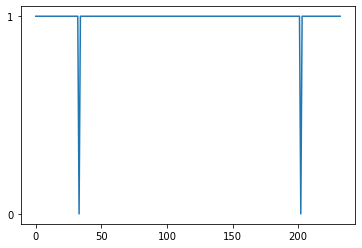

In [178]:
sns.lineplot(x=range(len(gnb.predict(vect)[5695:])), y= gnb.predict(vect)[5695:])

In [180]:
final_predictions = pd.DataFrame({'Message':alldata,
                                  'Prediction':gnb.predict(vect)[5693:]})

In [185]:
final_predictions.Prediction.unique()

array(['1', '0'], dtype=object)

In [22]:
x1

<5728x37305 sparse matrix of type '<class 'numpy.int64'>'
	with 705662 stored elements in Compressed Sparse Row format>

# Classifier based on Message Body

In [ ]:
Bodydata.head()

In [ ]:
print(Bodydata['Message'][10])